<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 40px;'>🚀</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>TRM Extra Mile | Data Scientist</span>
</div>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: normal; font-size: 19px; color: #F;'>Data Analysis</span>
</div>

<br><br>

<div style='color: #2C4C65; text-align: center; font-size: 28px; font-weight: bold'>
  <p>
    Content
  </p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Analysing contribution of each variable</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Analysing the necessity of developing new features</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath(".."))
from utils.plots import plotter as ptz

import warnings
warnings.filterwarnings("ignore")

# Reading data from data folder
df = pd.read_csv('../data/bronze_data.csv').drop(['Unnamed: 0'],axis=1)

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>Dist plot</span>
</div>

<br>

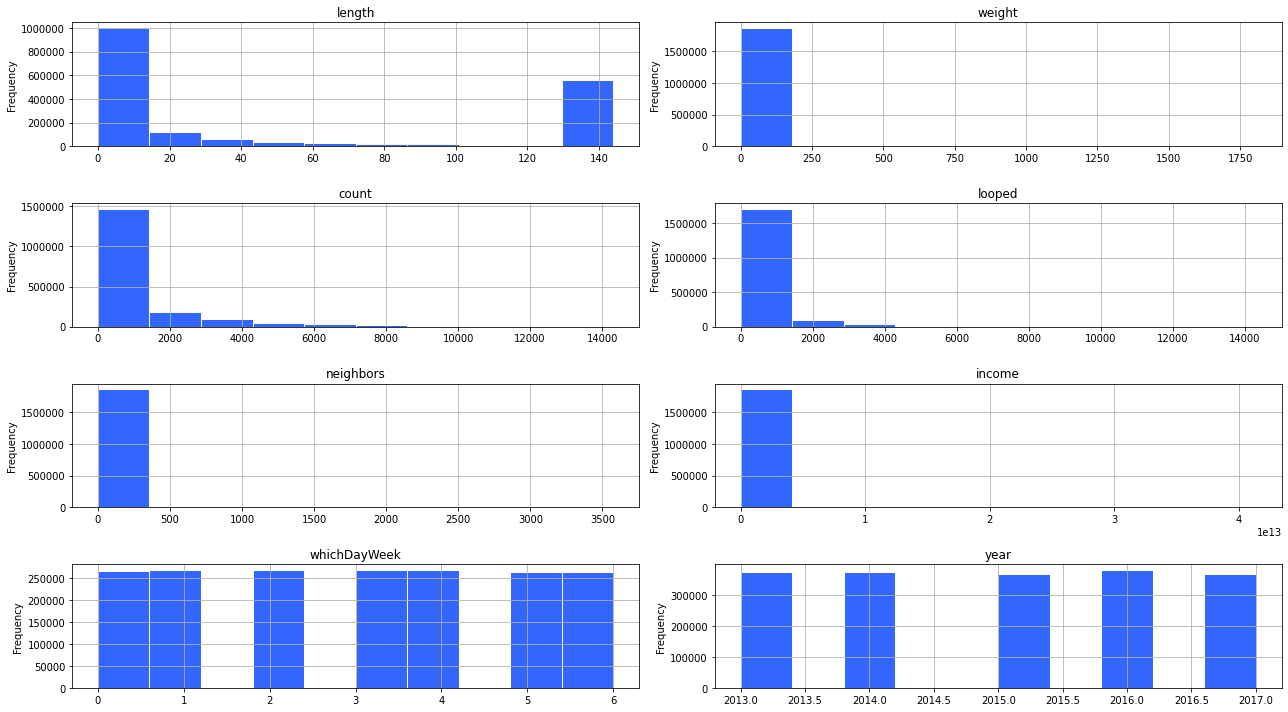

In [2]:
ptz.plotar_dist(df=df[[
    'length',
    'weight',
    'count',
    'looped',
    'neighbors',
    'income',
    'whichDayWeek',
    'year'
]], ncols=2, nrow=4)

### Checking boxplot

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>Boxplot checking</span>
</div>

<br>

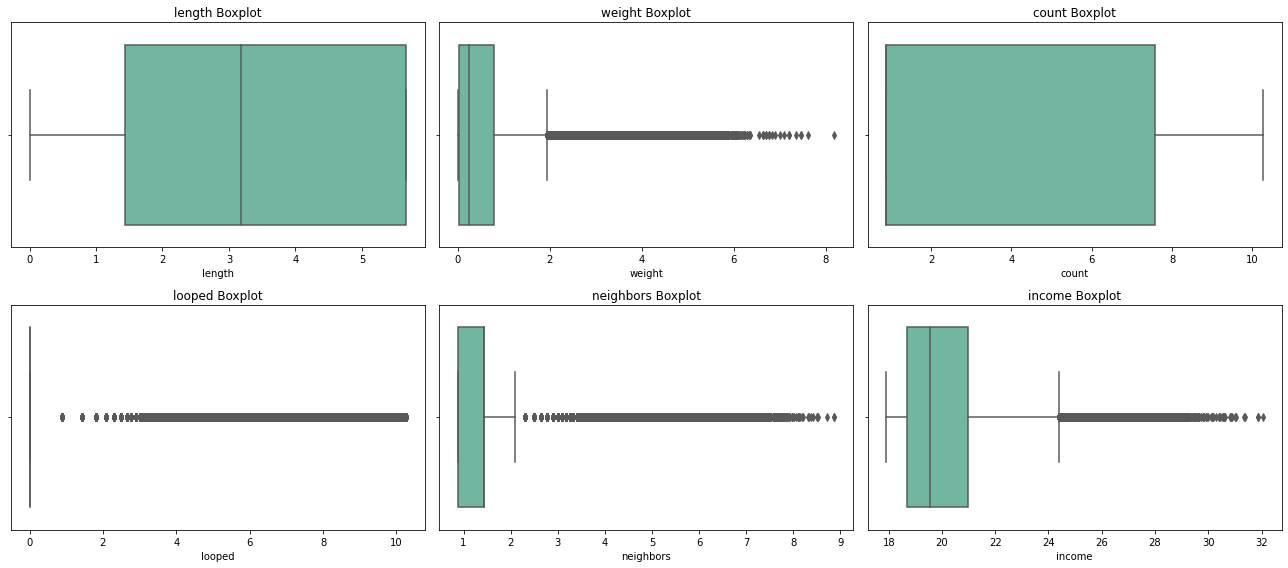

In [3]:
# Para transformação em tanh

df_testing = df.copy()

for col in ['length', 'weight', 'count', 'looped', 'neighbors', 'income']:
    df_testing[col] = np.arcsinh(df_testing[col])

outliers = ptz.plotar_nested_boxplot(
    df=df_testing,
    cols=['length', 'weight', 'count', 'looped', 'neighbors', 'income']
)

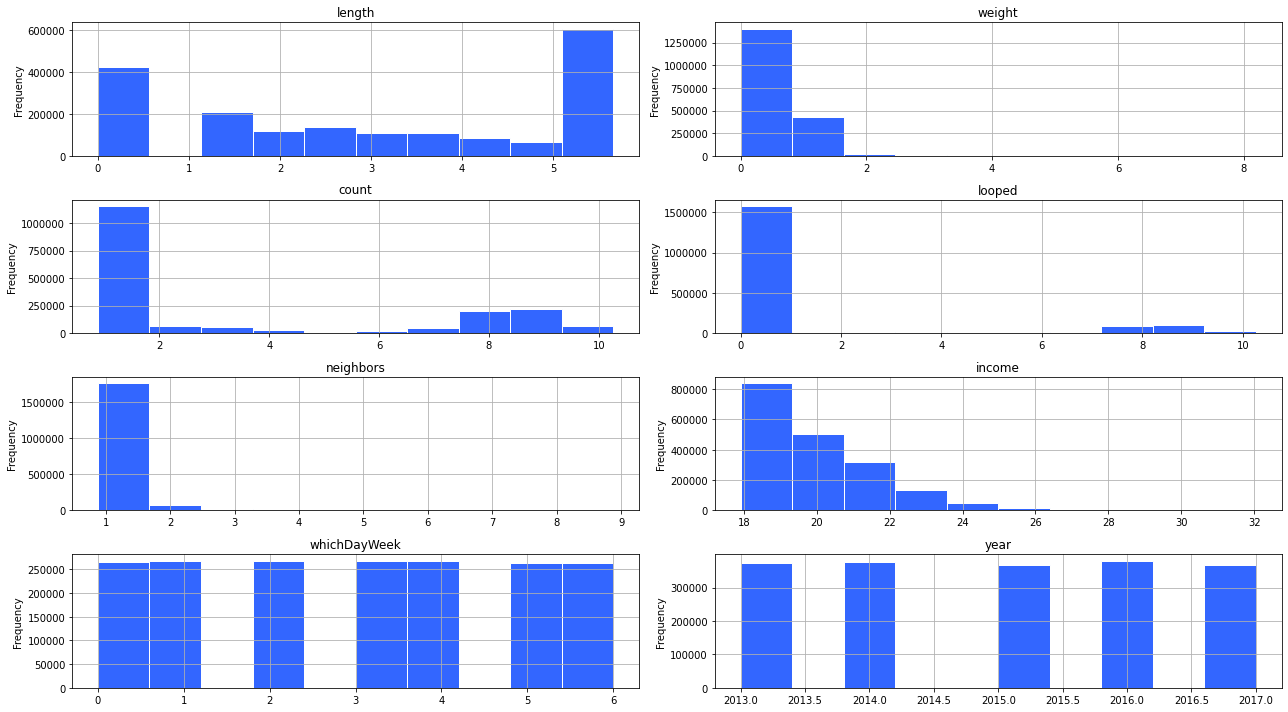

In [4]:
ptz.plotar_dist(df=df_testing[[
    'length',
    'weight',
    'count',
    'looped',
    'neighbors',
    'income',
    'whichDayWeek',
    'year'
]], ncols=2, nrow=4)

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>Testing Normalizing data</span>
</div>

<br>

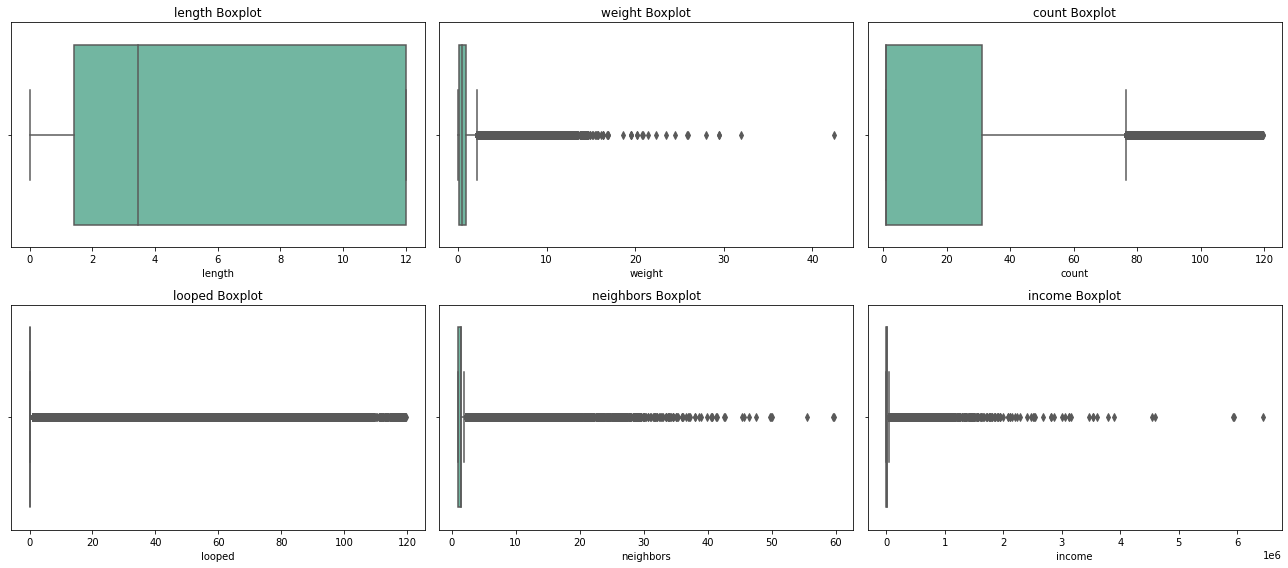

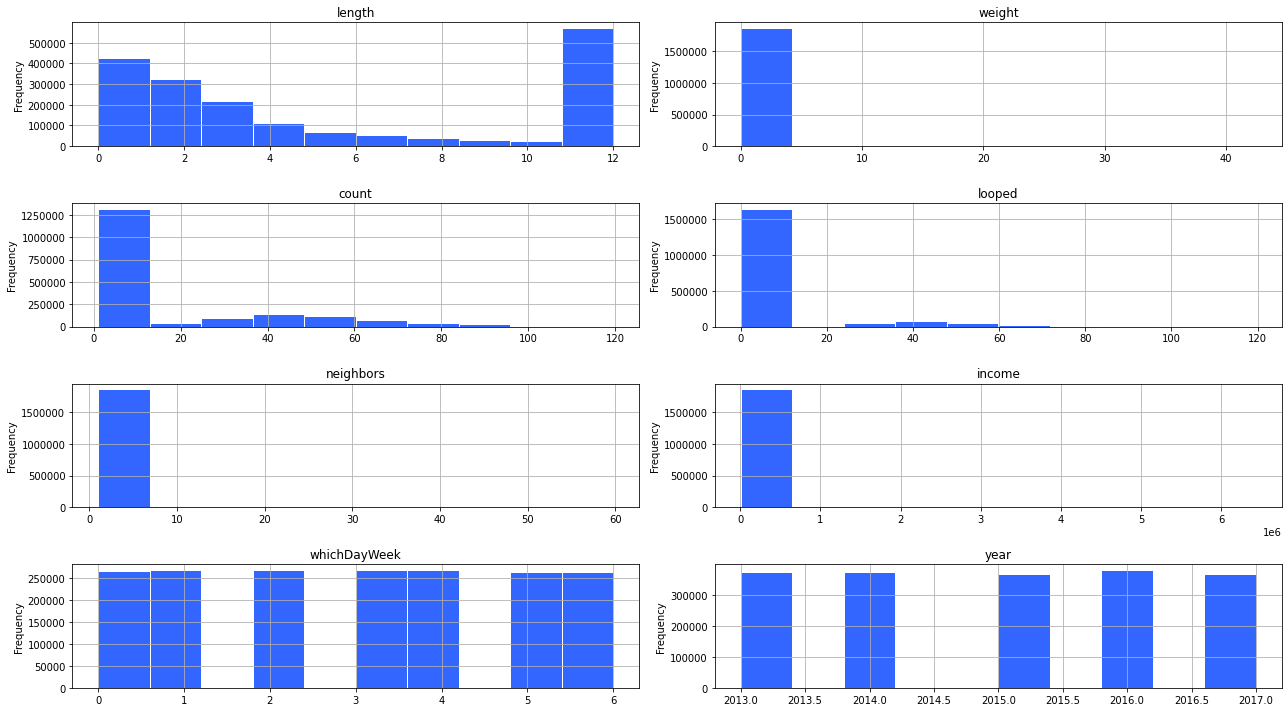

,length,weight,count,looped,neighbors,income
0,None,2.155265,90.111043,1.000000,2.449490,52680.437508
1,None,2.216013,94.725920,57.297469,2.449490,62143.978751
2,None,2.626264,86.388657,1.000000,2.449490,60362.891896
3,None,2.121320,99.327740,1.414214,2.236068,67796.153099
4,None,2.239718,86.562116,34.481879,2.645751,51195.702945
...,...,...,...,...,...,...
1865626,None,NaN,NaN,NaN,NaN,NaN
1865627,None,NaN,NaN,NaN,NaN,NaN
1865628,None,NaN,NaN,NaN,NaN,NaN
1865629,None,NaN,NaN,NaN,NaN,NaN


In [4]:
# Para transformação em tanh

df_testing_double = df.copy()

for col in ['length', 'weight', 'count', 'looped', 'neighbors', 'income']:
    df_testing_double[col] = np.sqrt(df_testing_double[col])

outliers = ptz.plotar_nested_boxplot(
    df=df_testing_double,
    cols=['length', 'weight', 'count', 'looped', 'neighbors', 'income']
)

ptz.plotar_dist(df=df_testing_double[[
    'length',
    'weight',
    'count',
    'looped',
    'neighbors',
    'income',
    'whichDayWeek',
    'year'
]], ncols=2, nrow=4) ; 

outliers

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>Distribution of target</span>
</div>

<br>

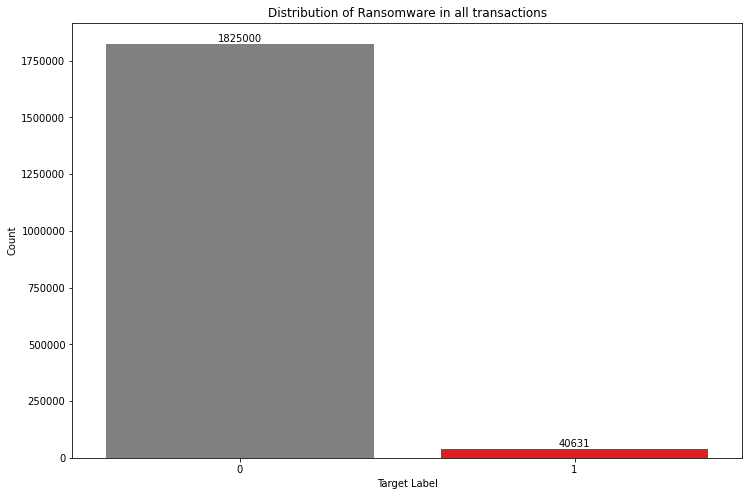

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


value_counts_df = df_testing_double['target'].value_counts().reset_index()
value_counts_df.columns = ['target_label', 'count']

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=value_counts_df, 
    x='target_label', 
    y='count',
    palette={0: 'grey', 1: 'red'}
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom')

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Target Label')
plt.ylabel('Count')
plt.title('Distribution of Ransomware in all transactions')
plt.show()


### Distribution in relation to HUE

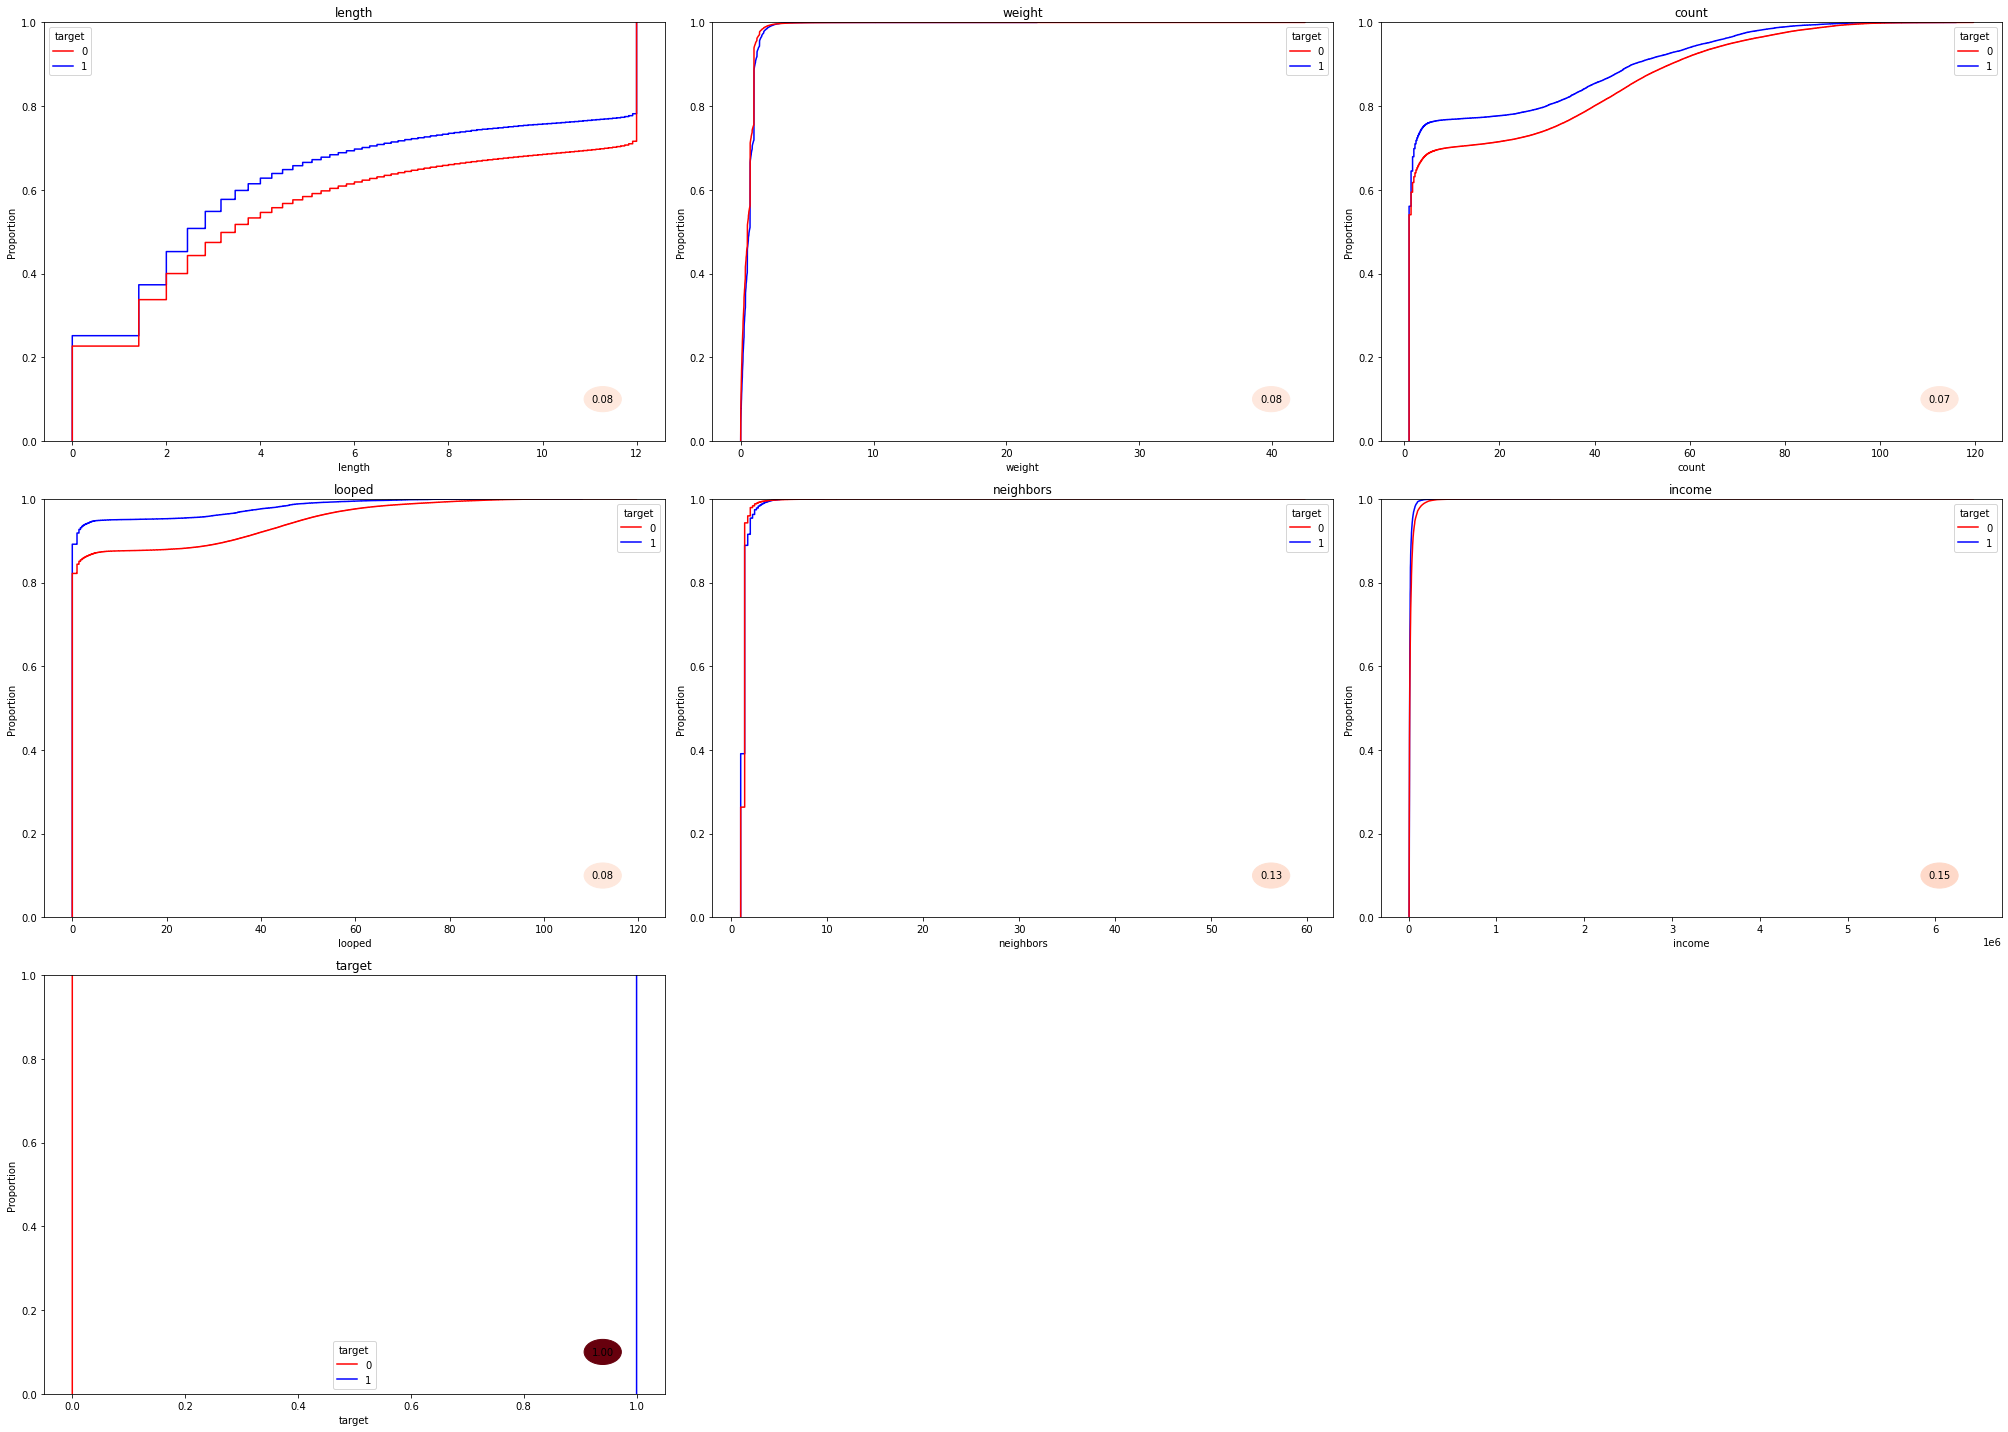

In [6]:
ptz.plot_ecdf_features(
    df=df_testing_double[[
        'length', 
        'weight', 
        'count', 
        'looped', 
        'neighbors', 
        'income',
        'target'
    ]],
    hue='target',
    figsize=(28,20)
)

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>Correlation of Spearman</span>
</div>

<br>

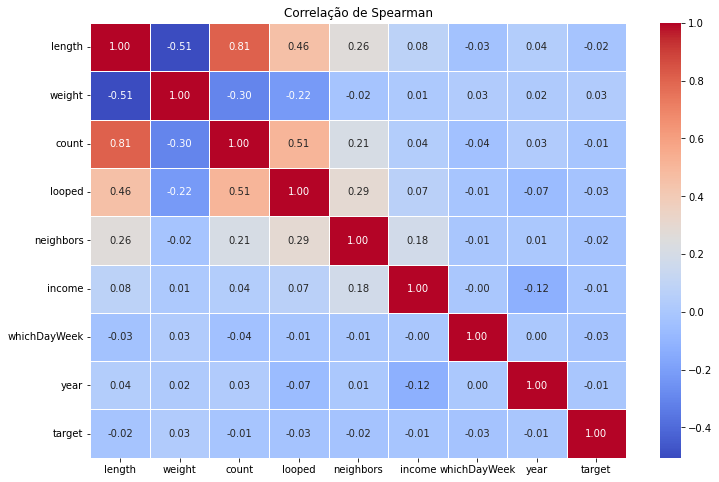

In [7]:
ptz.corrplot(df=df[[
    'length',
    'weight',
    'count',
    'looped',
    'neighbors',
    'income',
    'whichDayWeek',
    'year',
    'target'
]]
)

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>Heatmaps</span>
</div>

<br>

In [9]:
df_testing_double['length_class'] = pd.cut(x=df_testing_double['length'], bins=[-1,2,4,6,8,10,12], labels=['0-2','2-4','4-6','6-8','8-10','10-12'])
df_testing_double['weight_class'] = pd.cut(x=df_testing_double['weight'], bins=[-1,10,20,30,43], labels=['0-10','10-20','20-30','30-43'])
df_testing_double['count_class'] = pd.cut(x=df_testing_double['count'], bins=[-1,20,40,60,80,100,120], labels=['0-20','20-40','40-60','60-80','80-100','100-120'])
df_testing_double['looped_class'] = pd.cut(x=df_testing_double['count'], bins=[-1,20,40,60,80,100,120], labels=['0-20','20-40','40-60','60-80','80-100','100-120'])
df_testing_double['neighbors_class'] = pd.cut(x=df_testing_double['neighbors'], bins=[-1,10,20,30,40,50,60], labels=['0-10','10-20','20-30','30-40','40-50','50-60'])
# df_plot = df_testing_double.pivot(index='length_class', columns='weight_class', values='target')

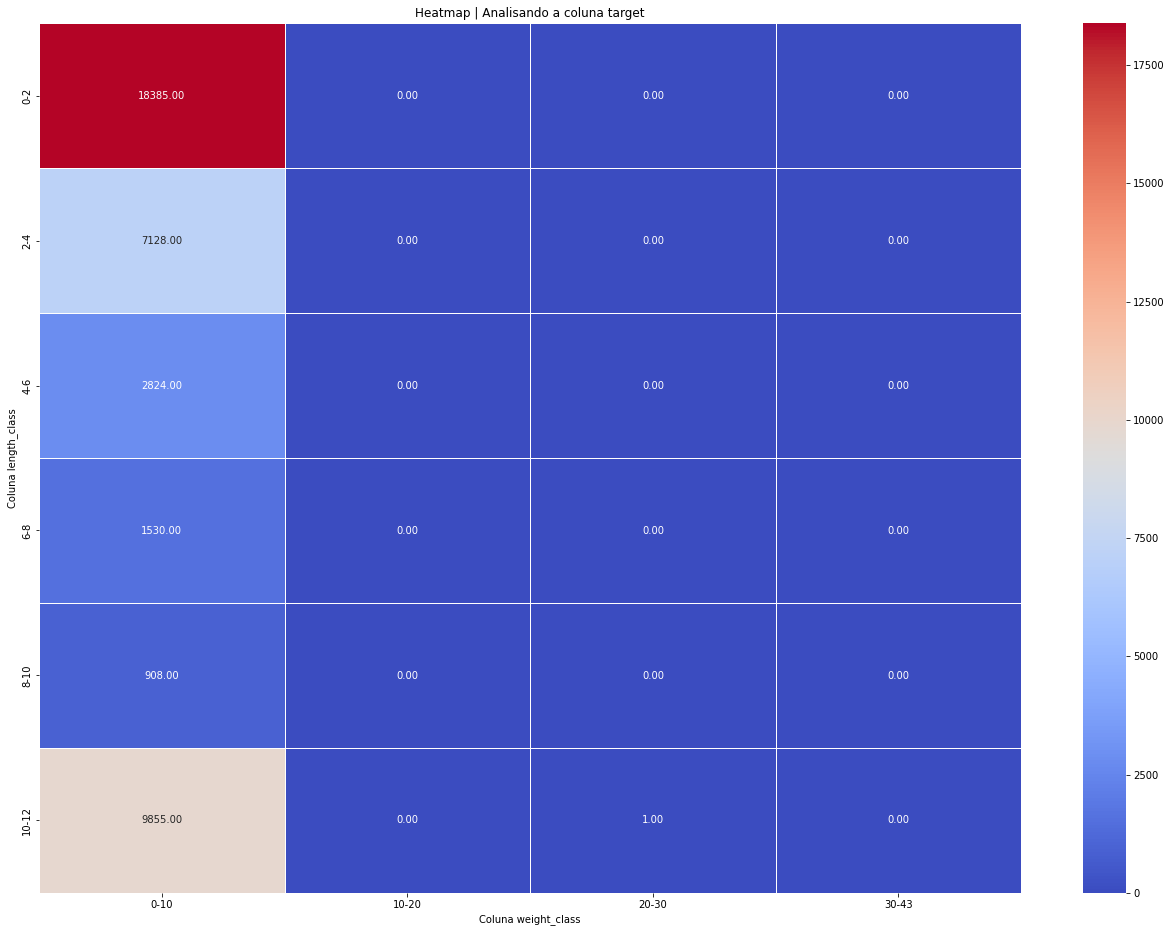

In [14]:
ptz.plot_heatmap(df=df_testing_double, 
                 index='length_class', 
                 columns='weight_class', 
                 values='target',
                 statistics='sum')

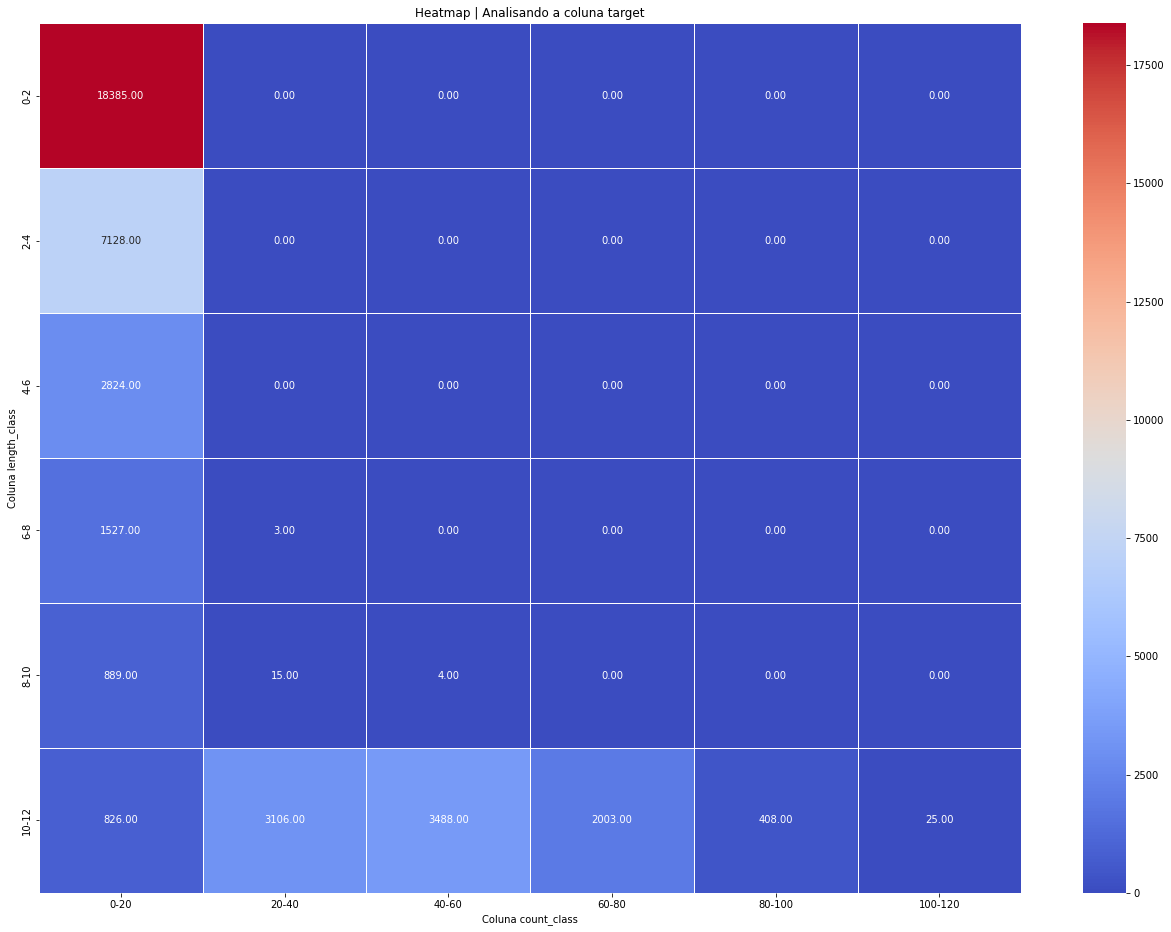

In [11]:
ptz.plot_heatmap(df=df_testing_double, 
                 index='length_class', 
                 columns='count_class', 
                 values='target',
                 statistics='sum')

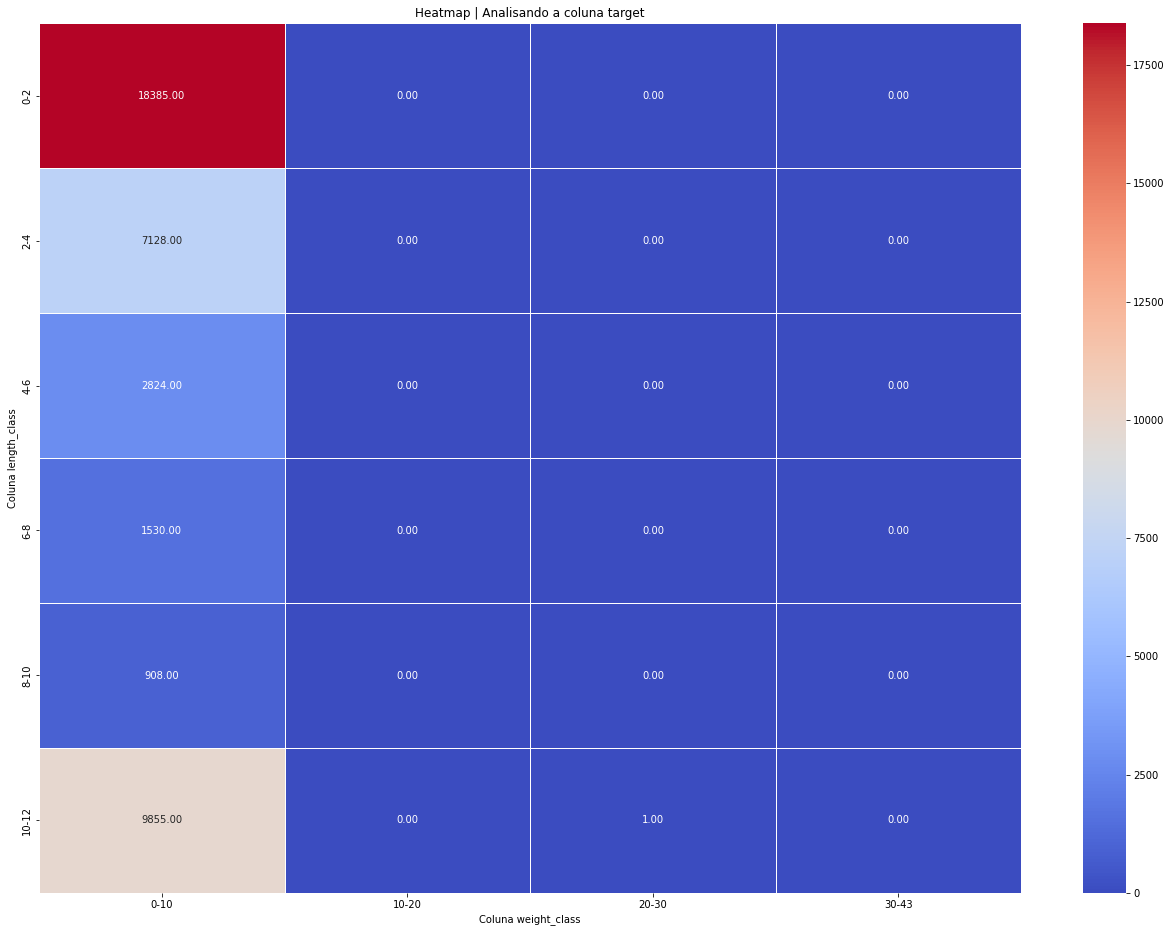

In [10]:
ptz.plot_heatmap(df=df_testing_double, 
                 index='length_class', 
                 columns='weight_class', 
                 values='target',
                 statistics='sum')